# Events and States in React

Uptill now, we have learned how to build UIs with the help of React **components**. We also learned about **props**-a concept and features that enables React developers to build and resue configurable components.

These are all important React features and building blocks, but with these features alone, you would only be able to build static React apps (that is, web apps that never change). You would not be able to change or update the content on the screen if you only had acess to those features. You would also not be able to react to any user events and update the UI in response to such events.

In this notebook, we will look at the concept of **State**. State is a React feature that allows developers to update internal data and trigger UI update based on those data adjustments. We will also look at how to react to use events such as button cliks or text being entered into input fields.

In [1]:
import React from 'npm:react';
import { renderToString } from 'npm:react-dom/server';
import { useState } from 'npm:react';

## Input Field Example

Let's take an example of email input field. We could take naive approach to create this input field by writing it in vanilla javascript but it will be *imperative* code. That is, we are not declaring the desired end state; we are instead describing a way of getting there. **And it's not using React.**

React is all about controlling the UI and that writing React code is about writing declaritive code - instead of imperative code. 

In React, we can attach event listeners directly to the JSX elements to which they belong. So an email input field in React may look like this:

In [2]:
export default function EmailInput() {
    let errorMessage= '';
    
    function evaluateEmail (event) {
        console.log('Hello');
        const eneteredEmail = event.target.value;
        if (enteredEmail.trim() == '' || !enteredEmail.includes('@')) {
            errorMessage = 'The entered email address is invalid.';
        }
        else {
            errorMessage = '';
        }
    };
    
    return (
        <div>
        <input placeholder="Your Email" type="email" onBlur={evaluateEmail} />
        <p>{errorMessage}</p>
        </div>
    );
};

In [3]:
import { html } from "https://deno.land/x/display/mod.ts";
const componentHTML = renderToString(<EmailInput />);
html`<div>${componentHTML}</div>`;

The **onBlur** (event when user removes his/her cursor from the field) prop was added to the built-in input element. This prop is made availble by React, just as all these base HTML elements (such as `<input>` and `<p>`) are made avaiable as components by React. *In fact, all these built-in HTML components come with their standard HTML attributes as React props (plus some extra props, such as thr **onBlur** event handling prop)*

### Events
```js
return (
        <div>
        <input placeholder="Your Email" type="email" onBlur={evaluateEmail} />
        <p>{errorMessage}</p>
        </div>
    );
```


React exposes all standard events that can be connected to DOM elements as **onXYZ** props (where **XYZ** is the event name, such as **Blur** or **Click**). We can react to the **blur** event (when user removes his/her cursor from the field) by adding the `onBlur` prop. We can listen to **click** event via the `onClick` prop. 

These props requires values to fullfill their job. To be precise, they need a **pointer** to the function that should be executed when the event occurs. In the preceeding example, the `onBlur` prop receives a pointer to the `evaluateEmail` function as value. 

NOTE: Theres a difference between pointer to a function like **evaluateEmail** and function execution syntanx **evaluateEmail()**. Always set a pointer to some function when handling evants.

## Updating State Correctly

The EmailInput() component we wrote is good implmentation of an email input field, however its not updating and rendering the error message

```js
 function evaluateEmail (event) {
        console.log('Hello');
        const eneteredEmail = event.target.value;
        if (enteredEmail.trim() == '' || !enteredEmail.includes('@')) {
            errorMessage = 'The entered email address is invalid.';
        }
        else {
            errorMessage = '';
        }
    };
```

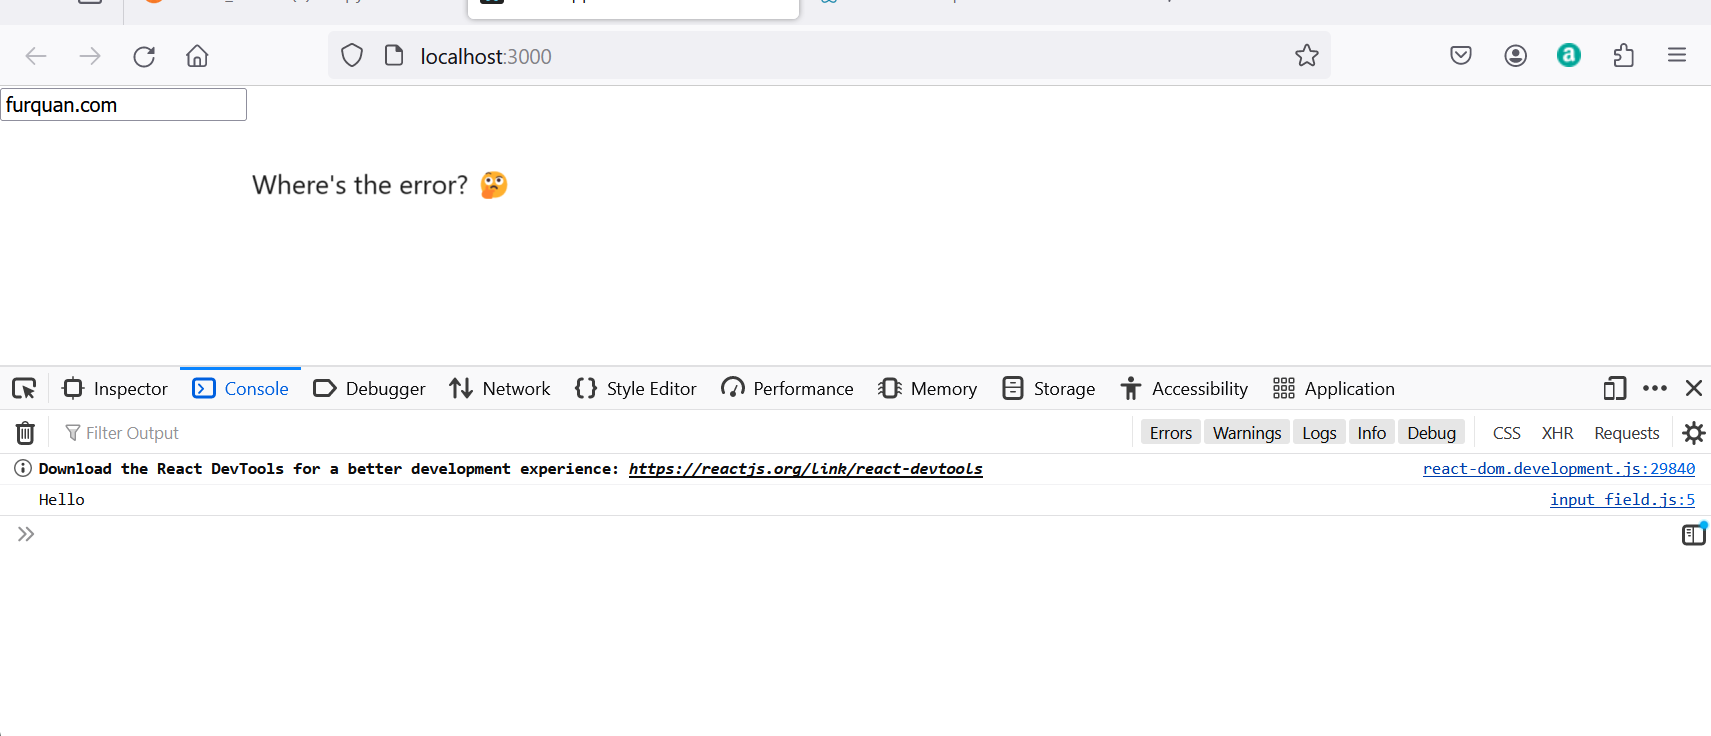

We can see that `evaluateEmail()` function is being executed on the *blur* event since it's logging in the console 'Hello', but where is the error message? as clearly it voilates the format of an email input.

*What is missing is a feature that forces React to update the visible UI on the screen and the content that is displayed to the app users.*

That is where React's **state** come into play.

Like props, state is a key concept of React, but whereas props are about receiving external data inside a component, state is about managing and updating **internal data**. Whenever a state is updated, React goes ahead and updates the parts of the UI that are affected by the state change.

## EmailInput field with state

```js
import { useState } from 'react';

function EmailInput() {
    const [errorMessage, setErrorMessage] = useState('');
    
    function evaluateEmail (event) {
    const enteredEmail = event.target.value
    if (enteredEmail.trim() === '' || !enteredEmail.includes('@')) {
            setErrorMessage('The entered email address is invalid.');
        } else {
            setErrorMessage('');
        }
    };
    
    return (
        <div>
        <input placeholder="Your Email" type="email" onBlur={evaluateEmail} />
        <p>{errorMessage}</p>
        </div>
    );
};

```

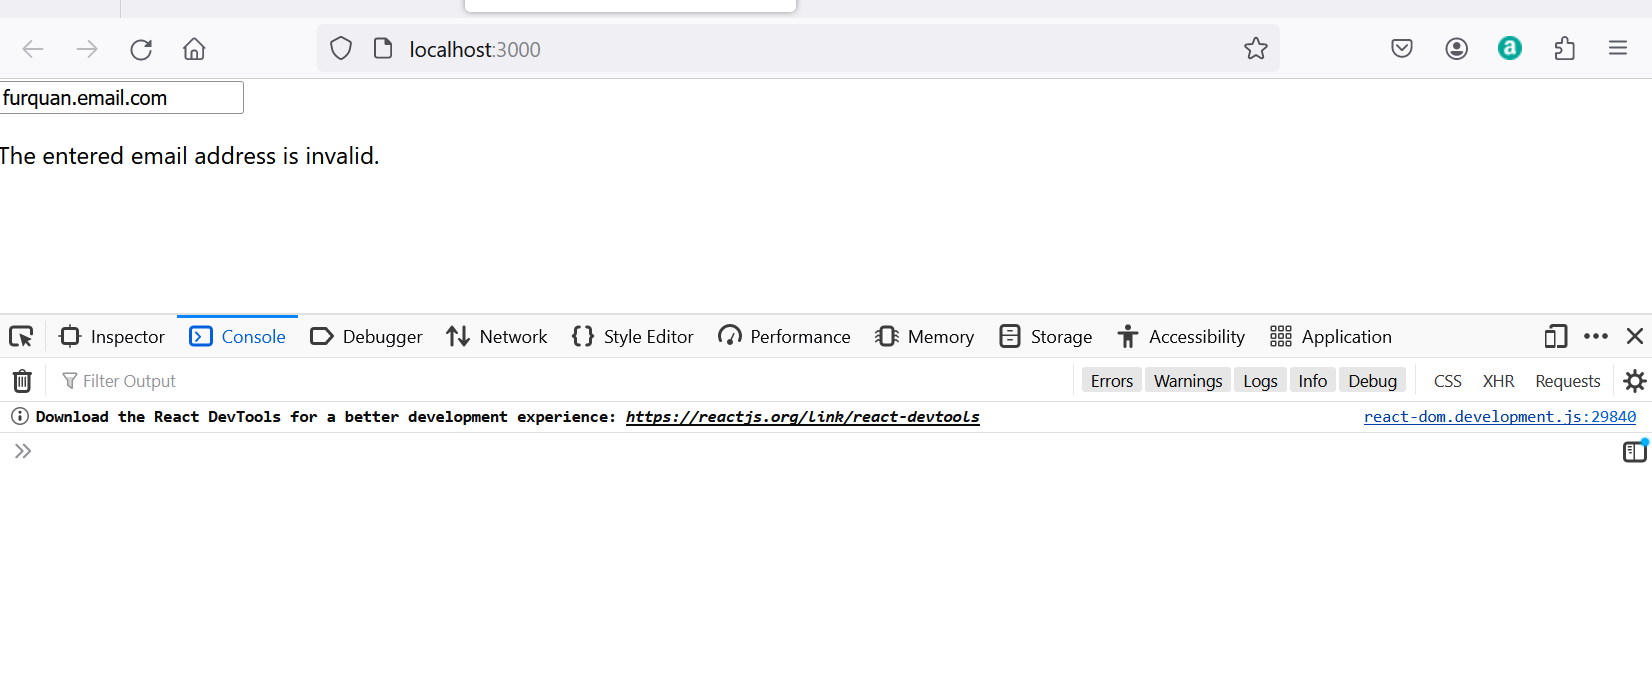

The key difference of this EmailInput() component compared to it's previous iteration is the usage of **useState()** Hook. 

**Hooks** are another key concept of React. These are specical functions that can only by used inside of React components (or inside of other Hooks). Hooks add special features and behaviours to the React components in which they are used. For example, the **useState()** Hook allows a component to set and manage some state that is tied to this component. React provides various built-in hooks, not all focused on state management though.

## The mighty useState() hook

The useState() Hook is extremely important and commonly used Hook as it enables you to manage data inside a component, which, when updated, tells React to update the UI accordingly. This is the core idea behing **state management** and this state concept: *state is data, which, when changed, should force React to re-evaluate a component and update the UI if needed.*

Using Hooks such as **useState()** is pretty straightforward: 

```js
import { useState } from 'react';
```
by calling useState() inside a component function, you register some data with React. It's a bit like defining a variable or constant in vanilla Javascript. But there is something special: React will track the registered value internally, and whenever you update it, React will re-evaluate the component function in which the state was registered.

React does this by checking whether the data used in the component changed. Most importantly, React validates whether the UI needs to change because of changed data (for example, because a value is output inside the JSX code). If React determines that the UI needs to change, it goes ahead and updates the real DOM in the places where an update is needed (for example, changing some text thats displayed on screen). If no update is needed, React end the component re-evaluation without updating the DOM.

```js
const [errorMessage, setErrorMessage] = useState('');
```
This creates a state value `errorMessage` (which wil be stored and managed by React) and ties it a specific component (i.e EmailInput). An initial state value is registered by simply passing it as a parameter value to `useState()`. In the above example, an empty string (`''`) is registered as a first value. useState() does not just accept a parameter value. It also returns a value: an array with exactly two elements. First is the state value itself (errorMessage) and the other is a function (setErrorMessage) that can be used to update the state value and trigger any DOM manipulation necessary.

## States under the hood

React provides a way of reading state values: the first element in the array returned by **useState()**. The first element holds the current state value which can be used in any place where you need to know the state value (for example, in the JSX code to output it there). In addition, we may also need to update the state, for example, because a user enetered a new email address. Since we don't manage the state value ourselves, React gives us a function that we can call to inform React about our new state value. That's the second element in the returend array from useState(). In the example shown before, we called **setErrorMessage('Error!')** to set the **errorMessage** state value to a new string ('Error!').

This feature is a key innovation of React. React must be informed whenever there's a state that impacts the UI changes. Otherwise, the visible UI does'nt change at all, even in cases where it should. The state updating function like **setErrorMessage('Error!')** not only sets a new valuel it also informs React that a state value changed, and that the UI might therefore be in need of an update. React determines the new target UI by rerunning (also called re-evaluating) any component functions that are affected by a state change. That includes the component function that executerd the **useState()** function. It also includes any child components, since an update in a parent component could lead to a new state data that's also used by some child components (the state value could be passed to child components via props).


## Multiples State Slices

We can manage multiple state values (also often called **state slices**), by simply calling **useState()** multple times in our component function.

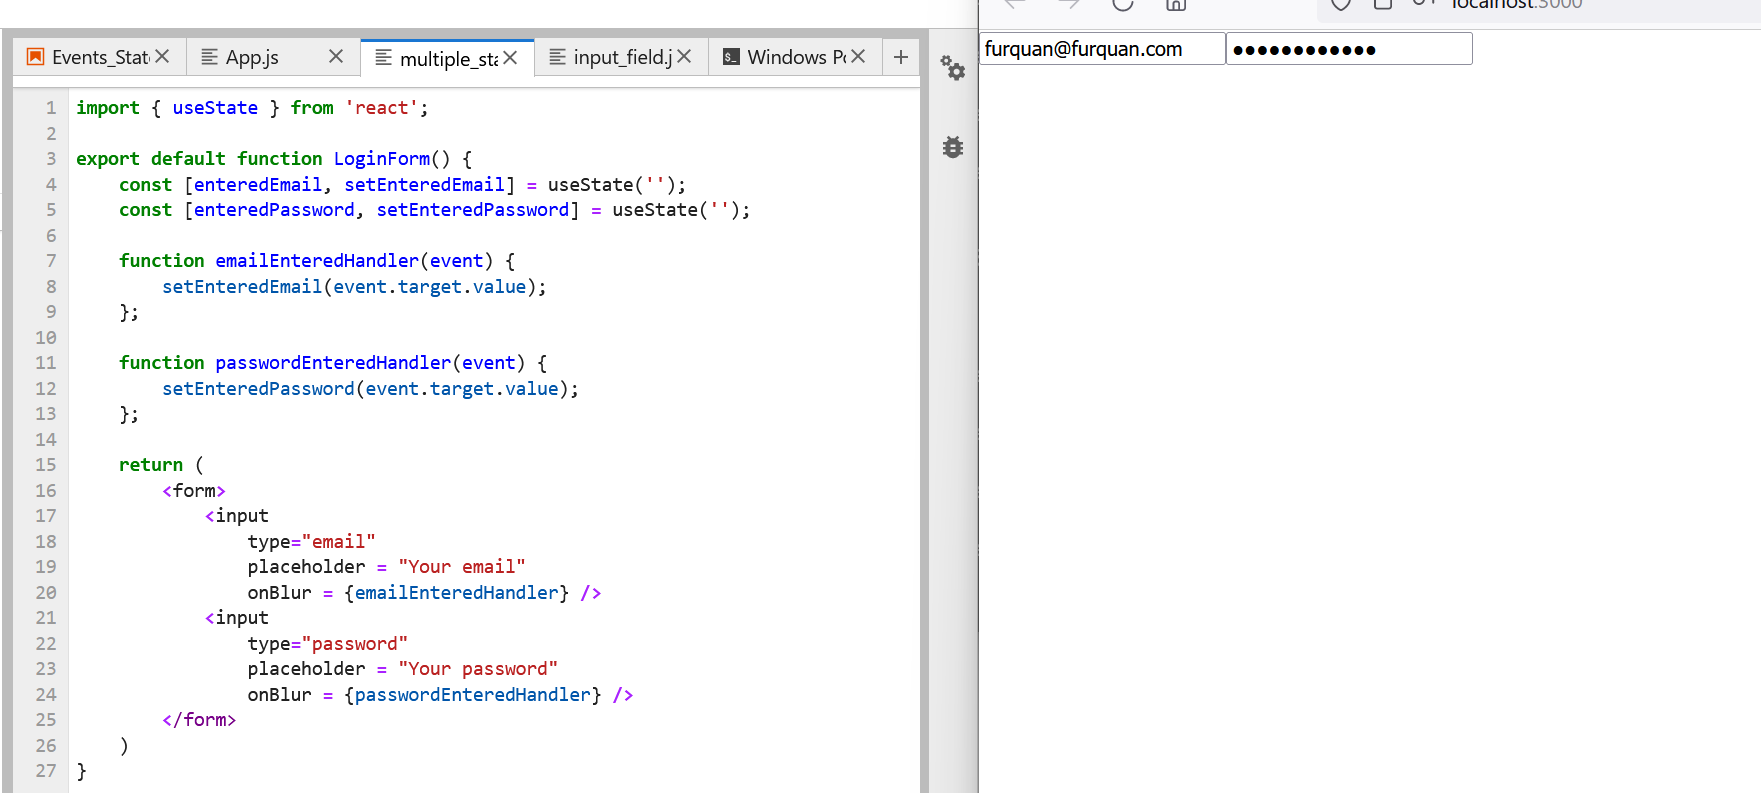

In the example above, two state slices are managed by calling **useState()** twice. Therefore, React registers two state values internally. These two cvalues can be read and updated independently from each other.

We can register as many state slices as we may need in a component. Alternatively, we can also manage a single, *merged* state value object.

## Combined State Objects

Instead of calling **useState()** for every single state slice, we can go for one big state object that combines all the different state values

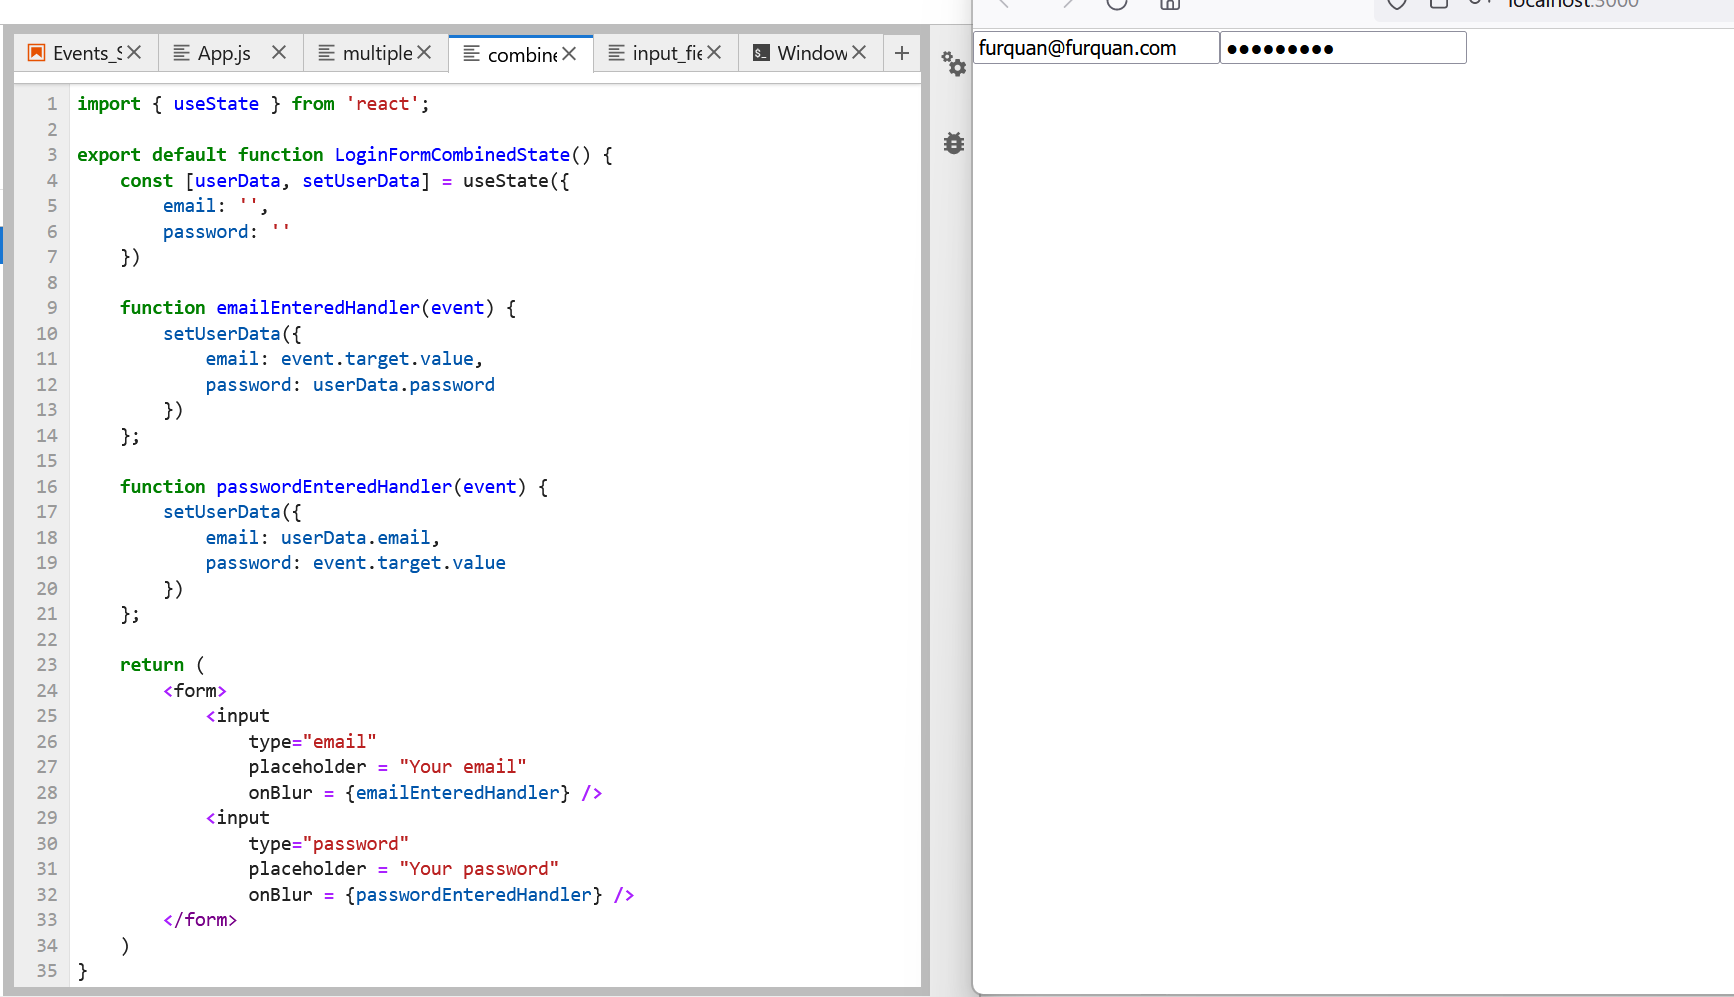

When managing state objects as shown above, there's one crucial thing you should keep in mind: you must always set all properties the object contains, even the ones that didn;t change. This is required because, when calling the state-updating function, you tell React which new state value should be stored internally. 

Thus, any value you pass as an argument to the state-updating function will overwrite the previously stored value. If you provide an object that contains only the properties that changed, all other properties will be lost since the previous state object is replaced by the new one, which contains fewer properties. 

**This is a common pitfall when working with combined state objects and therefore something you must pay attention to.**

It is totally dependent on our personal preference if want to manage one combined state object for state values or have multiple state slices instead. Both approaches have their respective pros and cons. 


### Updating state based previous state correctly

A best practice and recommendation is that state update that *depend on some previous state* should be performed with the help of a function that's passed to the state-updating function. 

#### Incorrect way

```js
function Counter() {
    const [counter, setCounter] = useState(0);
    
    function incrementCounterHandler() {
        setCounter(counter + 1);
    };
    
    return (
        <>
            <p> Counter Value: {counter}</p>
            <button onClick={incrementCounterHandler}>Increment</button>
        </>
    );
}
```

#### correct way

```js
function Counter() {
    const [counter, setCounter] = useState(0);
    
    function incrementCounterHandler() {
        setCounter(function(prevCounter) => {return prevCounter + 1});
    };
    
    return (
        <>
            <p> Counter Value: {counter}</p>
            <button onClick={incrementCounterHandler}>Increment</button>
        </>
    );
}
```

This might look a bit strange as a function is passed as an argument to the state-updating function, but React won't store that function as the new state value. Instead, when receiving a function as new state value in the state-updating function, React will call that function for you and pass the latest state value to that function. Therefore, you should provide a function that accepts at least one parameter: the previous state value. This value will be passed into the function automatically by React, when React exceutes the function internally.

## Two-way binding

There is one special usage of React's state concept that is worth discussing: two-way binding.

Two-way binding is a concept that is used if you have an input source (typically an `<input>` element) that sets some state upon user input (for instance, upon `click` event) and outputs the input at the same time:

```js
function NewsletterField() {
    const [email, setEmail] = useState('');
    
    function changeEmailHandler(event) {
        setEmail(event.target.value);
    };

    function clearInputHandler() {
        setEmail(''); // reset email input field
    };
    
    return (
    <>
        <input 
            type="email"
            placeholder="Your email address"
            value={email}
            onChange={changeEmailHandler} />
                
        <button onClick={clearInputHandler}>Reset</button>
    </>
    );
}
```

Here the `<input>` element is using two-way binding, setting and outputing the state value (email) at the same time.

In this function, the `clearInputHandler` function is executed when `<button>` is clicked. Inside the function, the `email` state is set back to an empty string. Without two-way binding, the state would be updated, but the change would not be reflected in the `<input>` element. There, the user with still see their last input. The state reflected on the UI and the state managed internally by React would be different - a bug that must always be avoided.

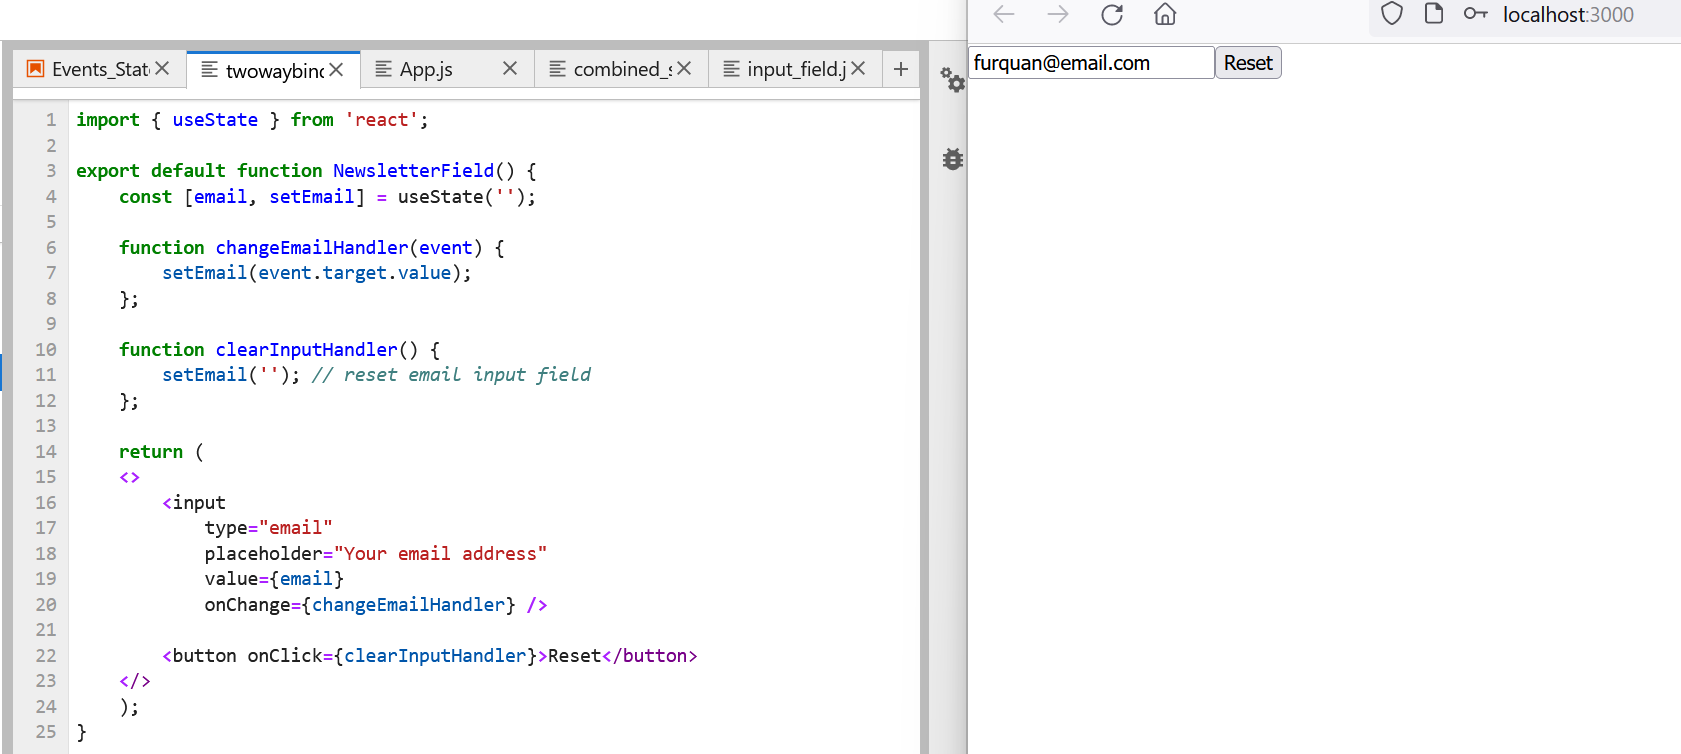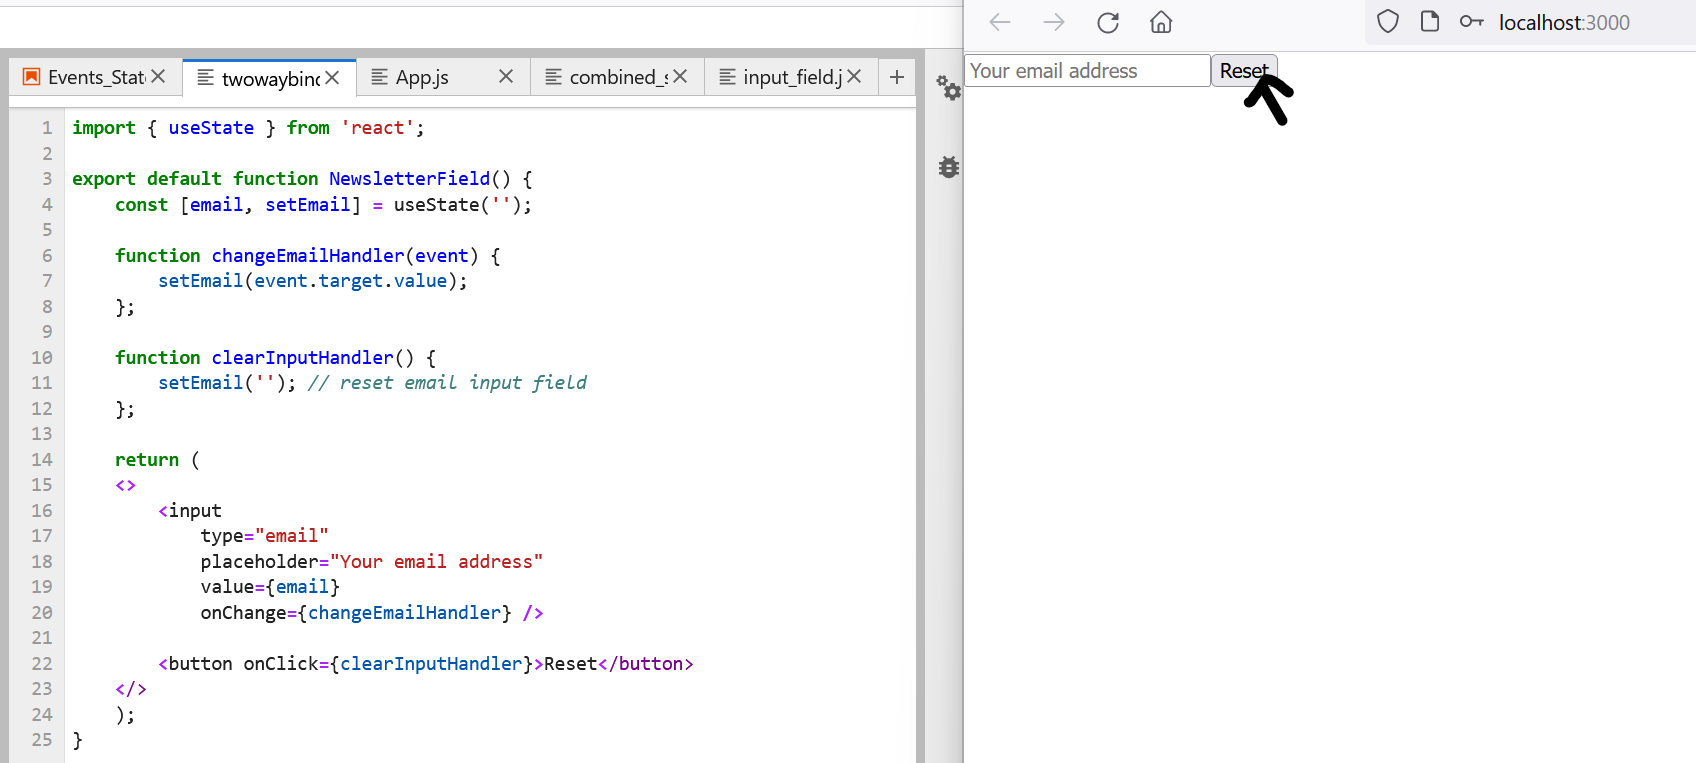